In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [146]:
df1=pd.read_csv("./raw data/IEB_export.csv")
print(len(df1))
print(df1.columns)

df1.head()


8914
Index(['Year', 'Month', 'Day', 'Time', 'Lat', 'Lon', 'Depth', 'Mag', 'Region',
       'Timestamp'],
      dtype='object')


,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2025,3,3,04:37:39,14.0119,40.0375,8.3,4.5,ETHIOPIA,1740976659
1,2025,3,2,20:38:47,14.1521,39.7806,10.0,4.1,ETHIOPIA,1740947927
2,2025,3,2,15:11:20,14.0665,39.8348,10.0,4.3,ETHIOPIA,1740928280
3,2025,3,2,08:14:58,14.2209,39.8918,10.0,5.2,ETHIOPIA,1740903298
4,2025,2,27,08:27:47,9.1703,40.2964,10.0,4.7,ETHIOPIA,1740644867


In [147]:


timestamp = 1740976659
dt_object = datetime.datetime.fromtimestamp(timestamp)

print(dt_object)
print(pd.to_datetime([dt_object]))

2025-03-03 06:37:39
DatetimeIndex(['2025-03-03 06:37:39'], dtype='datetime64[ns]', freq=None)


In [148]:
df2=pd.read_csv("./raw data/query.csv")
print(len(df2))
print(df2.columns)
df2.head()

1406
Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-02-27T08:27:47.775Z,9.1703,40.2964,10.0,4.7,mb,56.0,100.0,3.434,0.59,...,2025-02-27T19:15:15.007Z,"25 km NE of Āwash, Ethiopia",earthquake,8.82,1.913,0.080,47.0,reviewed,us,us
1,2025-02-24T00:52:18.097Z,9.5356,40.2869,10.0,4.5,mb,58.0,51.0,3.204,0.73,...,2025-03-05T22:22:54.803Z,"59 km SE of Abomsa, Ethiopia",earthquake,9.88,1.903,0.083,43.0,reviewed,us,us
2,2025-02-24T00:33:03.618Z,8.8833,39.8793,10.0,4.5,mb,51.0,101.0,3.931,1.00,...,2025-03-05T22:17:29.544Z,"4 km WSW of Metahāra, Ethiopia",earthquake,10.27,1.921,0.090,36.0,reviewed,us,us
3,2025-02-24T00:12:05.550Z,9.4122,40.1107,10.0,4.3,mb,43.0,65.0,3.416,0.65,...,2025-03-05T21:57:00.040Z,"47 km N of Āwash, Ethiopia",earthquake,9.88,1.922,0.099,29.0,reviewed,us,us
4,2025-02-23T23:44:50.808Z,9.4462,40.4361,10.0,5.3,mww,61.0,68.0,3.148,0.56,...,2025-03-05T02:29:56.118Z,"59 km NNE of Āwash, Ethiopia",earthquake,5.67,1.783,0.068,21.0,reviewed,us,us


In [149]:
# Standardizing column names
df1.columns = [col.lower() for col in df1.columns]
df2.columns = [col.lower() for col in df2.columns]

rename_map1 = { "lat": "latitude", "lon": "longitude", "mag": "magnitude"}
rename_map2={"time":"timestamp","mag": "magnitude"}
df1.rename(columns=rename_map1, inplace=True)
df2.rename(columns=rename_map2, inplace=True)

df1['timestamp'] = pd.to_datetime(df1[['year', 'month', 'day', 'time']]
                                  .astype(str).agg('-'.join, axis=1), errors='coerce')
df1 = df1[['timestamp', 'latitude', 'longitude', 'depth', 'magnitude']]


df2 = df2[['timestamp', 'latitude', 'longitude', 'depth', 'magnitude']]
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

# Standardizing timestamps to remove milliseconds and timezone information
df1['timestamp'] = df1['timestamp'].dt.floor('s').dt.tz_localize(None)
df2['timestamp'] = df2['timestamp'].dt.floor('s').dt.tz_localize(None)

print(df1.head())
print(df2.head())

print(f'Length of IRIS Dataset: {len(df1)}')
print(f'Length of USGS Dataset: {len(df2)}')



            timestamp  latitude  longitude  depth  magnitude
0 2025-03-03 04:37:39   14.0119    40.0375    8.3        4.5
1 2025-03-02 20:38:47   14.1521    39.7806   10.0        4.1
2 2025-03-02 15:11:20   14.0665    39.8348   10.0        4.3
3 2025-03-02 08:14:58   14.2209    39.8918   10.0        5.2
4 2025-02-27 08:27:47    9.1703    40.2964   10.0        4.7
            timestamp  latitude  longitude  depth  magnitude
0 2025-02-27 08:27:47    9.1703    40.2964   10.0        4.7
1 2025-02-24 00:52:18    9.5356    40.2869   10.0        4.5
2 2025-02-24 00:33:03    8.8833    39.8793   10.0        4.5
3 2025-02-24 00:12:05    9.4122    40.1107   10.0        4.3
4 2025-02-23 23:44:50    9.4462    40.4361   10.0        5.3
Length of IRIS Dataset: 8914
Length of USGS Dataset: 1406


In [150]:
# Merge datasets
df = pd.concat([df1, df2], ignore_index=True)
df.drop_duplicates(inplace=True)

# Handle missing values
df.ffill(inplace=True)

# Feature Engineering
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
# Ethiopian Seasons
df['season'] = df['month'].map({12: 'bega', 1: 'bega', 2: 'belg', 3: 'belg', 4: 'belg', 
                                 5: 'belg', 6: 'kiremt', 7: 'kiremt', 8: 'kiremt', 
                                 9: 'kiremt', 10: 'bega', 11: 'bega'})


In [151]:
# Compute earthquake clustering
df['previous_quake'] = df['timestamp'].diff().dt.total_seconds()
df['seismic_activity'] = df['previous_quake'].apply(lambda x: 1 if x < 86400 else 0)

def compute_b_value(magnitudes):
    Mmean = np.mean(magnitudes)
    return (1 / (Mmean - np.min(magnitudes))) * np.log10(np.e)

df['b_value'] = compute_b_value(df['magnitude'])
df.head()
print(f'Length for the concatenated dataset: {len(df)}')
print(f'Duplicate value: {(len(df1)+len(df2))-len(df)}')

Length for the concatenated dataset: 10180
Duplicate value: 140


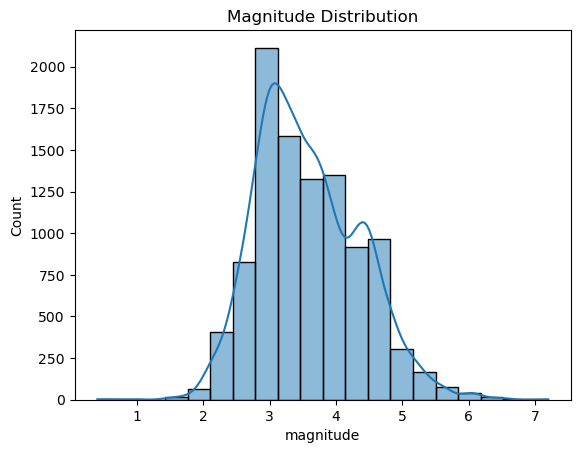

In [156]:
# Visualization
sns.histplot(df['magnitude'], bins=20, kde=True)
plt.title("Magnitude Distribution")
plt.show()


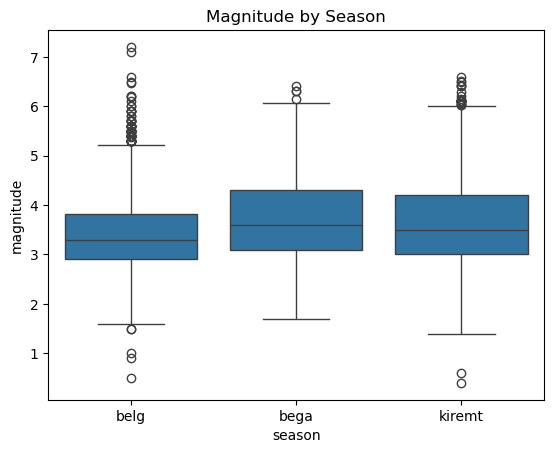

In [158]:
sns.boxplot(x='season', y='magnitude', data=df)
plt.title("Magnitude by Season")
plt.show()

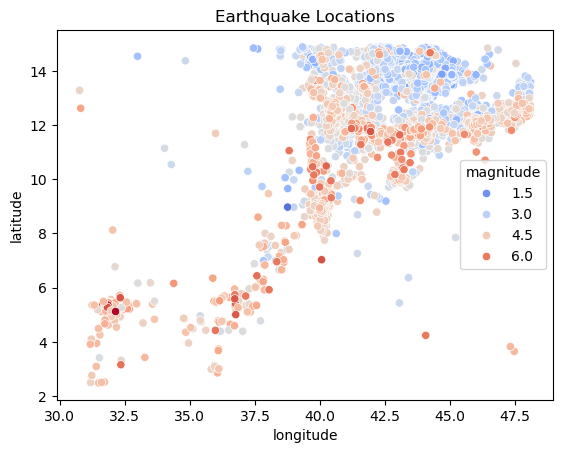

In [159]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['magnitude'], palette='coolwarm')
plt.title("Earthquake Locations")
plt.show()


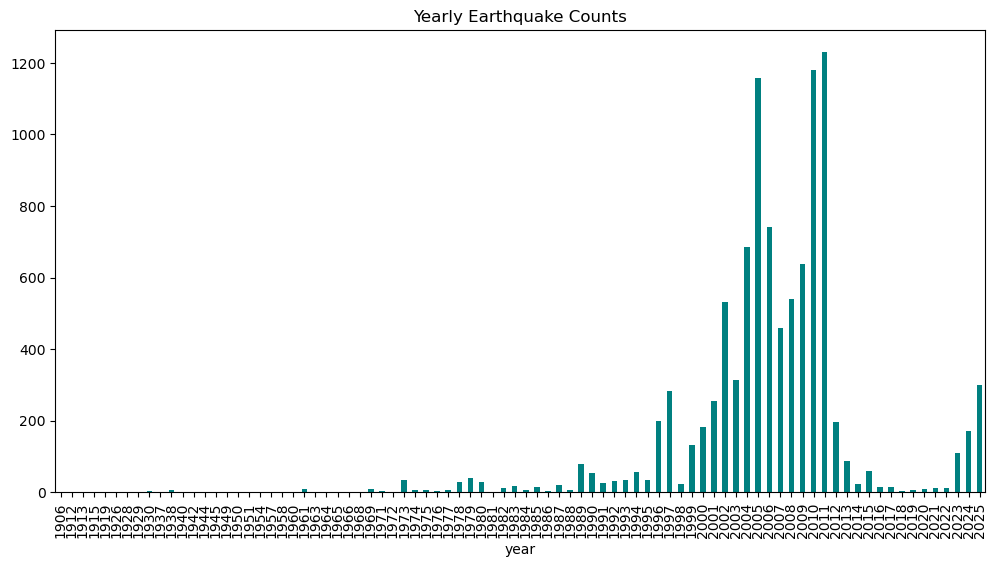

In [160]:

plt.figure(figsize=(12, 6))
df.groupby('year')['magnitude'].count().plot(kind='bar', color='teal')
plt.title("Yearly Earthquake Counts")
plt.show()


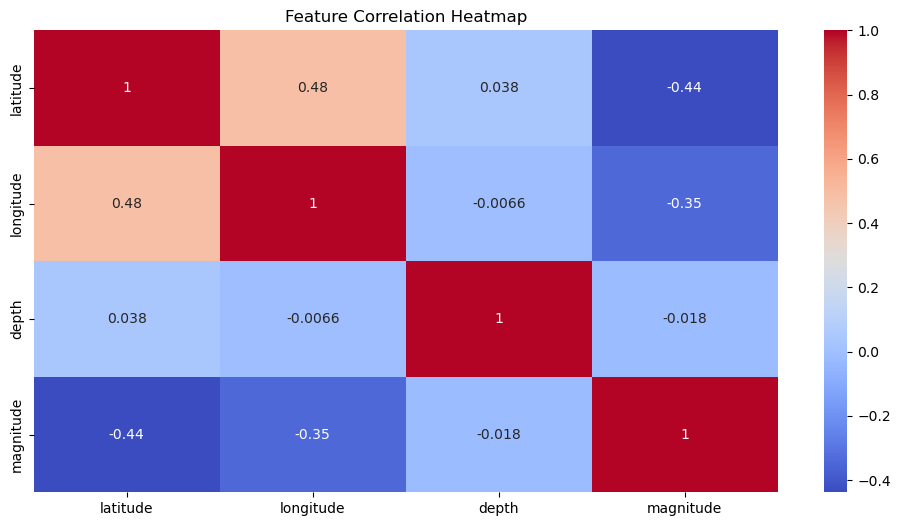

In [161]:

plt.figure(figsize=(12, 6))
sns.heatmap(df[['latitude', 'longitude', 'depth', 'magnitude']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

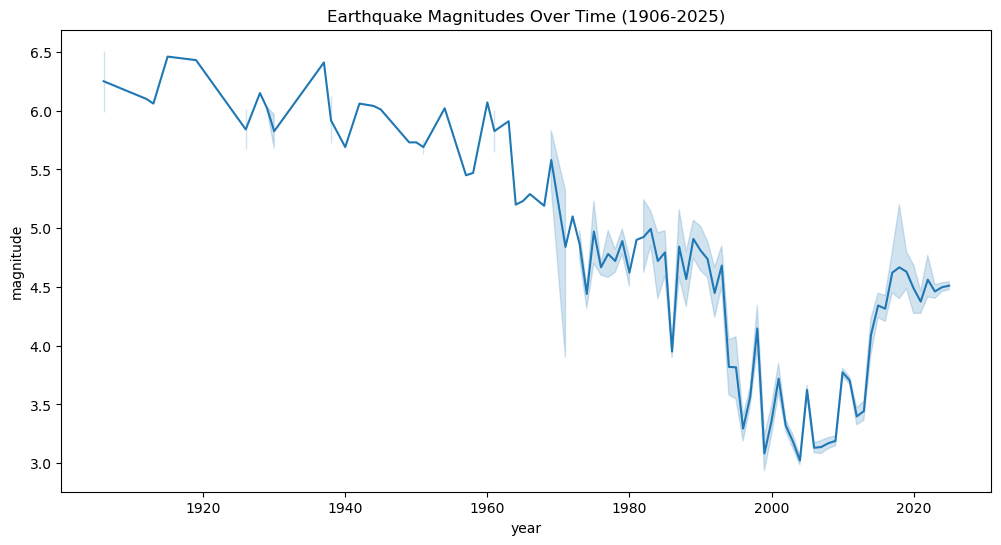

In [163]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='magnitude', data=df)
plt.title("Earthquake Magnitudes Over Time (1906-2025)")
plt.show()

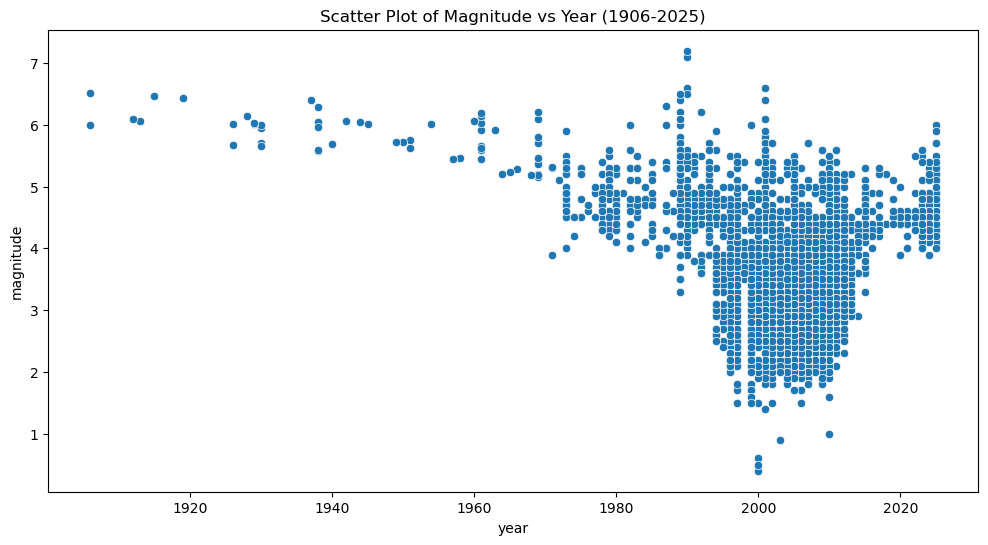

In [165]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='magnitude', data=df)
plt.title("Scatter Plot of Magnitude vs Year (1906-2025)")
plt.show()

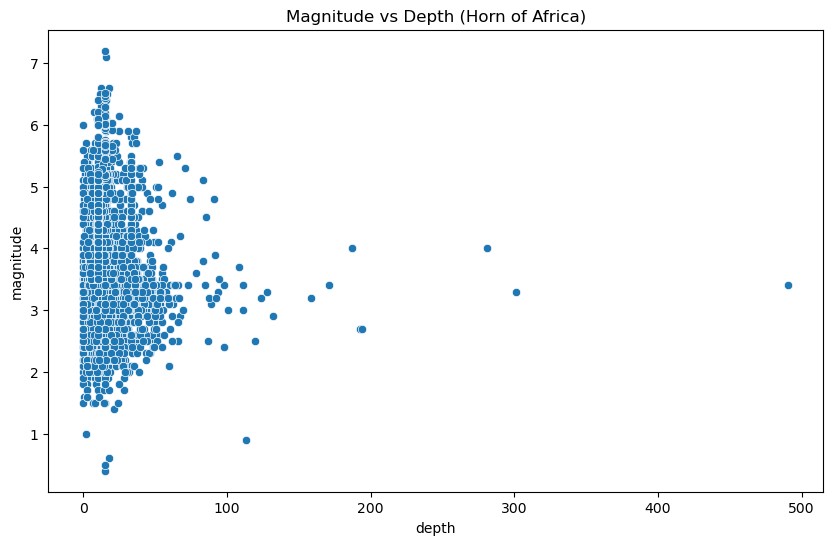

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitude', data=df)
plt.title("Magnitude vs Depth (Horn of Africa)")
plt.show()

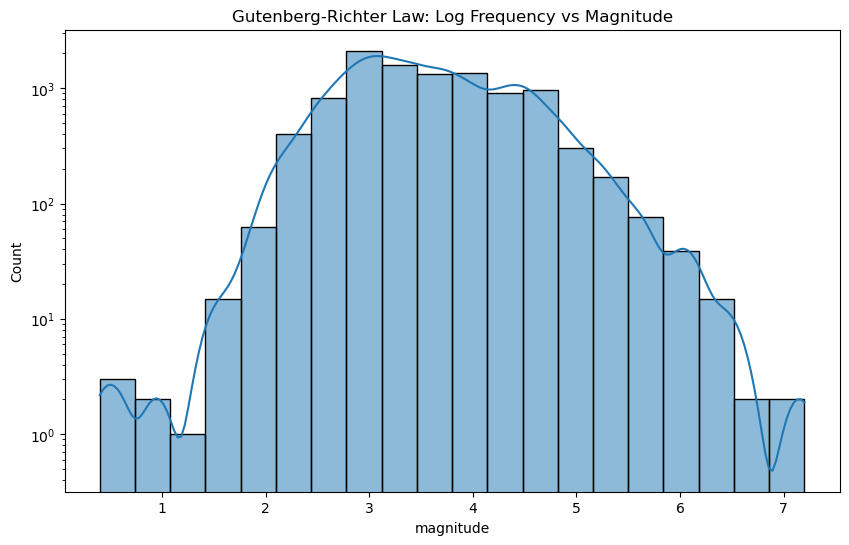

In [167]:
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], bins=20, kde=True)
plt.title("Gutenberg-Richter Law: Log Frequency vs Magnitude")
plt.yscale("log")
plt.show()

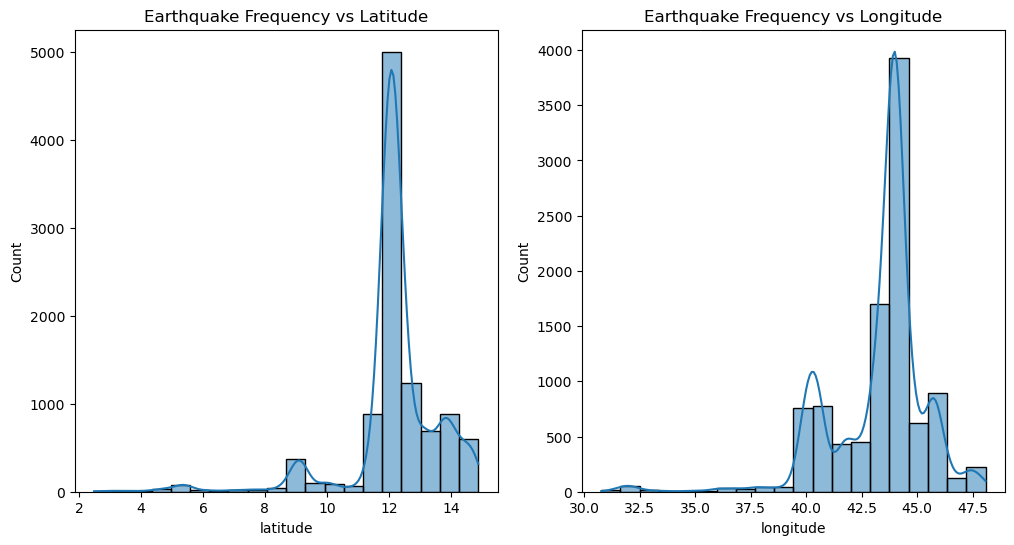

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['latitude'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Earthquake Frequency vs Latitude")
sns.histplot(df['longitude'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Earthquake Frequency vs Longitude")
plt.show()

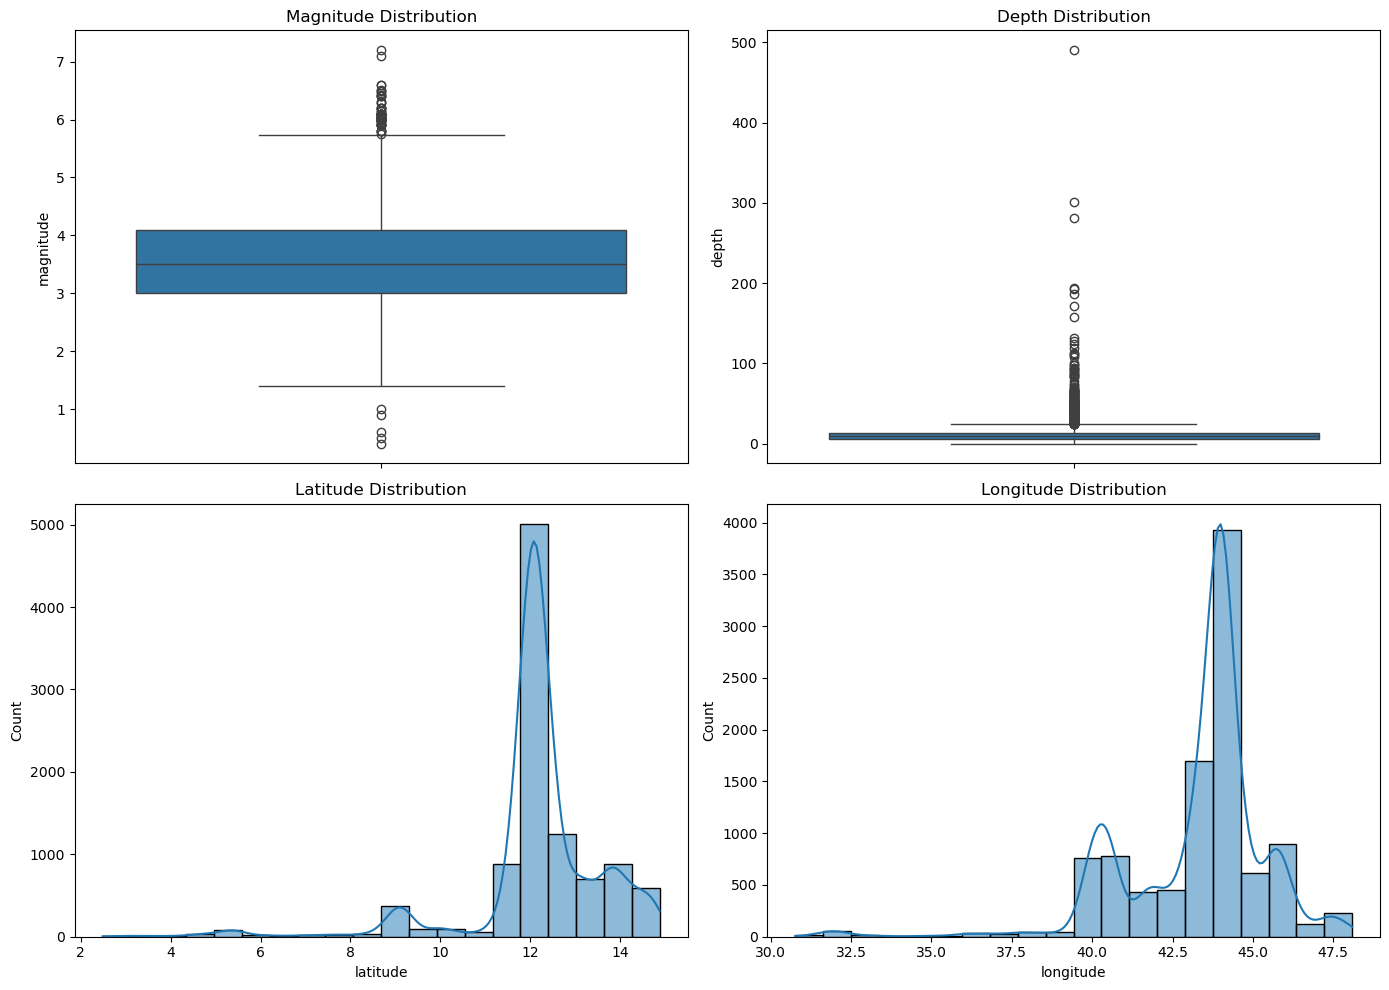

In [170]:
# Subplots of key earthquake features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(y=df['magnitude'], ax=axes[0, 0])
axes[0, 0].set_title("Magnitude Distribution")
sns.boxplot(y=df['depth'], ax=axes[0, 1])
axes[0, 1].set_title("Depth Distribution")
sns.histplot(df['latitude'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Latitude Distribution")
sns.histplot(df['longitude'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Longitude Distribution")
plt.tight_layout()
plt.show()